In [1]:
cluster = 'a2744'
zclus = {'a2744' : 0.308,
         'm0416' : 0.396}
pgals = {'a2744' : [1.689791e-01, 1.965115e+00, 2.0],
        'm0416' : [3.737113e-01, 1.322081e+00, 2.0]}
nclus = {'a2744': "Abell 2744",
         'm0416' : "MACS 0416"}

import sys
utils = 'C:\\Users\\Jackson\\Jupyter projects\\Master\\Utility\\'
sys.path.insert(0, utils)

root = 'C:\\Users\\Jackson\\Jupyter projects\\'
sys.path.insert(0, root)
filebase = 'C:\\Users\\Jackson\\Jupyter projects\\Master\\' + nclus[cluster] + "\\Files\\"

import numpy as np
import numpy.ma as ma
from astropy.cosmology import FlatLambdaCDM
from os import listdir
from os.path import isfile, join
import MCUtil as MC
import DeltaSquared as DS
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import statistics
import fitClusParallel as myfit

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
zlens = zclus[cluster]
imgdat = myfit.imgclass(root + "Files/" + cluster + '_images_0.5.dat',zlens,cosmo)

Read image data from file C:\Users\Jackson\Jupyter projects\Files/a2744_images_0.5.dat


In [2]:
sameDet = ["CM + sigmaDet", "CM + sigmaDet - 1", "CM + sigmaDet - 2", "CM + sigmaDet - 3", "CM + sigmaDet - 4"]
sameRF = ["Coe + rf", "Coe + rf - 1", "Coe + rf - 2", "Coe + rf - 3", "Coe + rf - 4"]

In [3]:
#Compare scores between different realizations of same sigma
def compSame(arr):
    print("Cross comparison D^2 between models with same parameters: ")
    count = 0
    sum  = 0
    for i in range(len(arr)):
        for j in range(i + 1, len(arr)):
            dist1 = np.load(filebase + "MCMC\\"+ arr[i] + "-main.npy")
            dist2 = np.load(filebase + "MCMC\\" + arr[j] + "-main.npy")
            score = DS.TwoSampleTest(dist1, dist2)
            count += 1
            sum += score
            print(score)
            
    print("Average: {}".format(sum / count))

In [4]:
print("Different Runs of Deterministic Cut:")
compSame(sameDet)

Different Runs of Deterministic Cut:
Cross comparison D^2 between models with same parameters: 
0.46982645497471115
0.40824012901296813
0.720220805089673
1.167673900449292
0.6683285818425229
0.8574196149893617
0.876294008948604
0.48396948537413365
0.8251332873058415
0.9199677067952765
Average: 0.7397073974782384


In [5]:
print("Different Runs of probabilistic (random forest) Cut:")
compSame(sameRF)

Different Runs of probabilistic (random forest) Cut:
Cross comparison D^2 between models with same parameters: 
0.6113958293867239
0.6224054641120353
0.691138114345371
0.4171020140739917
0.5089527337371419
0.7434918735589585
0.5042347731148895
0.5122981688480095
0.4300913068547178
0.49763555764624817
Average: 0.5538745835678087


In [2]:
scoreFile = np.load(filebase + "scores.npy", allow_pickle = True)
modelScores = scoreFile[()]
print(modelScores.keys())

dict_keys(['CM + sigmaDet', 'CM + sigmaProb', 'CM + prop', 'CM + box', 'CM + knn', 'CM + logistic', 'CM + svm', 'CM + gnb', 'CM + mnb', 'CM + cnb', 'CM + rf', 'CMP + knn', 'CMP + logistic', 'CMP + svm', 'CMP + gnb', 'CMP + mnb', 'CMP + cnb', 'CMP + rf', 'Coe + knn', 'Coe + logistic', 'Coe + svm', 'Coe + gnb', 'Coe + mnb', 'Coe + cnb', 'Coe + rf', 'CM + rnn', 'CMP + rnn', 'Coe + rnn'])


In [3]:
#Compare probabilities of models
probsBase = filebase + "Galaxy Probability Files\\"
models = list(modelScores.keys())
probabilities = []

for model in models:
    probs = np.loadtxt(probsBase + model)
    probabilities.append(probs[:,3])
    
probabilities = np.array(probabilities)

In [4]:
corrMatrix = np.corrcoef(probabilities)
print(corrMatrix.shape)

(28, 28)


In [5]:
numModels = len(models)
dsMatrix = np.zeros((numModels, numModels))

for i in range(numModels):
    print(i)
    for j in range(numModels):
        dist1 = np.load(filebase + "\\MCMC\\"+ models[i] + "-main.npy")
        dist2 = np.load(filebase + "\\MCMC\\" + models[j] + "-main.npy")
        dscore = DS.TwoSampleTest(dist1, dist2)

        dsMatrix[i][j] = dscore

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


In [6]:
#Get images
imgdat = myfit.imgclass(root + "Files/" + cluster + '_images_0.5.dat',zlens,cosmo)

Read image data from file C:\Users\Jackson\Jupyter projects\Files/a2744_images_0.5.dat


Text(0.5, 0, 'Correlation Coefficient')

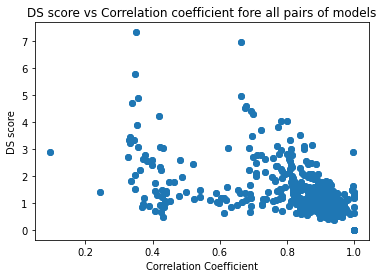

In [7]:
fig, ax = plt.subplots()
ax.scatter(corrMatrix, dsMatrix)

ax.set_title("DS score vs Correlation coefficient fore all pairs of models")

ax.set_ylabel("DS score")
ax.set_xlabel("Correlation Coefficient")

In [124]:
for i in range(len(corrMatrix)):
    for j in range(len(corrMatrix)):
        if (corrMatrix[i, j] < 0.4):
            print("{}, {}: {}: {}".format(models[i], models[j], corrMatrix[i, j], dsMatrix[i, j]))
        

CM + sigmaDet, CM + prop: 0.3324728150028103: 3.2159413070045493
CM + sigmaDet, CM + knn: 0.3987557818055305: 2.5897775598259356
CM + sigmaDet, CM + logistic: 0.3440557554848448: 3.3128222750051974
CM + sigmaDet, CM + svm: 0.36401779629613135: 2.2012025934328525
CM + sigmaDet, CM + mnb: 0.3567506163176141: 4.872682995714842
CM + sigmaDet, CM + cnb: 0.35011142827273384: 7.314920112592987
CM + sigmaDet, CMP + logistic: 0.33363357250799736: 3.4295595567479427
CM + sigmaDet, CMP + svm: 0.37069897009737895: 2.6134705347674543
CM + sigmaDet, CMP + mnb: 0.354906830738969: 3.8824497463170147
CM + sigmaDet, CMP + cnb: 0.3489931990386325: 5.754349016056713
CM + sigmaDet, CMP + rf: 0.38259621714454506: 2.556041219628787
CM + sigmaDet, Coe + knn: 0.33635480756393504: 1.8249602028973333
CM + sigmaDet, Coe + logistic: 0.3559138357308657: 3.0612006543741845
CM + sigmaDet, Coe + svm: 0.3266219700966777: 2.684004897238411
CM + sigmaDet, Coe + gnb: 0.3482582115582748: 2.0396448956143796
CM + sigmaDet, C

In [103]:
flatCorr = corrMatrix.flatten()

sortedCorr = np.sort(flatCorr)[::-1]

print(sortedCorr[:50])

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.99957765 0.99957765
 0.99955475 0.99955475 0.99954824 0.99954824 0.99923057 0.99923057
 0.99899058 0.99899058 0.99897292 0.99897292 0.9963341  0.9963341
 0.99632558 0.99632558 0.99335026 0.99335026 0.99331145 0.99331145
 0.98616362 0.98616362]


In [7]:
def probGraph(model1, model2):
    probs1 = np.loadtxt(probsBase + model1)
    probs2 = np.loadtxt(probsBase + model2)
    fig, ax = plt.subplots()
    ax.scatter(probs1[:,3], probs2[:,3])
    
    ax.set_title("{} probabilities vs {} probabilities A2744".format(model1, model2))
    ax.set_xlabel("{} probabilities".format(model1))
    ax.set_ylabel("{} probabilities".format(model2))
    
    print("Correlation Coefficient: {}".format(np.corrcoef(probs1[:,3], probs2[:,3])[0,1]))

Correlation Coefficient: 0.9320475695992175


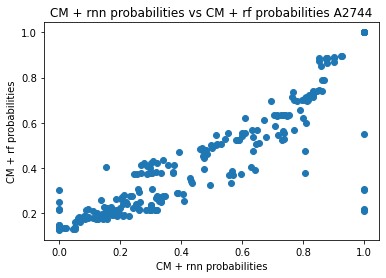

In [8]:
probGraph("CM + rnn", "CM + rf")

Correlation Coefficient: 0.397154634477292


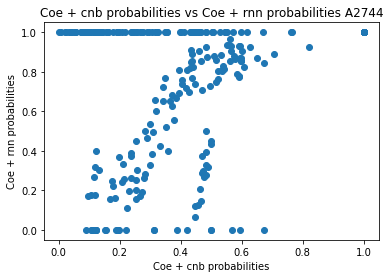

In [125]:
probGraph("Coe + cnb", "Coe + rnn")

In [16]:
print(imgdat.xarr.shape)
print(imgdat.nimg)

(71, 2)
71


In [10]:
sample = np.loadtxt(probsBase + models[0])
maxmag = np.min(sample[:,2])
def mse(probs1, probs2):
    return np.sum((probs1 - probs2) * (probs1 - probs2))

def msExtra(probs1, probs2, mags):
    weighted = abs(probs1 - probs2) * (10 ** -(0.4*mags))
    return np.sum(weighted)

def msWithImg(posx, posy, probs1, probs2, mags):
    dist = 0
    ngal = len(posx)
    ni = imgdat.nimg
    for i in range(ngal):
        for j in range(ni):
            r = ((imgdat.xarr[j][0] - posx[i])**2 + (imgdat.xarr[j][1] - posy[i])**2)**0.5
            dist += abs(probs1[i] - probs2[i]) * (10 ** -(0.4*mags[i])) / r
    
    return dist

def msWithImg2(posx, posy, probs1, probs2, mags):
    dist = 0
    ngal = len(posx)
    ni = imgdat.nimg
    for i in range(ngal):
        for j in range(ni):
            r = ((imgdat.xarr[j][0] - posx[i])**2 + (imgdat.xarr[j][1] - posy[i])**2)
            dist += abs(probs1[i] - probs2[i]) * (10 ** -(0.4*mags[i])) / r
    
    return dist
    

numModels = len(models)

In [ ]:
distMatrix1 = np.zeros((numModels, numModels))

for i in range(numModels):
    print(i)
    for j in range(numModels):
        probs1 = np.loadtxt(probsBase + models[i])
        probs2 = np.loadtxt(probsBase + models[j])
        
        distMatrix[i][j] = msWithImg(probs1[:,0], probs1[:,1], probs1[:,3], probs2[:,3], probs1[:,2])

In [11]:
distMatrix2 = np.zeros((numModels, numModels))
for i in range(numModels):
    print(i)
    for j in range(numModels):
        probs1 = np.loadtxt(probsBase + models[i])
        probs2 = np.loadtxt(probsBase + models[j])
        
        distMatrix[i][j] = msWithImg2(probs1[:,0], probs1[:,1], probs1[:,3], probs2[:,3], probs1[:,2])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


Text(0.5, 0, 'Weighted difference')

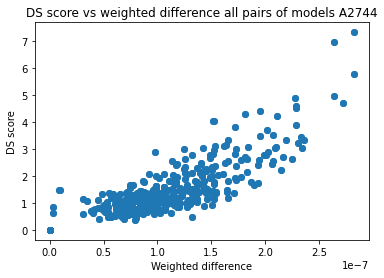

In [9]:
fig, ax = plt.subplots()
ax.scatter(distMatrix, dsMatrix)

ax.set_title("DS score vs weighted difference all pairs of models A2744")

ax.set_ylabel("DS score")
ax.set_xlabel("Weighted difference")

Text(0.5, 0, 'Weighted difference')

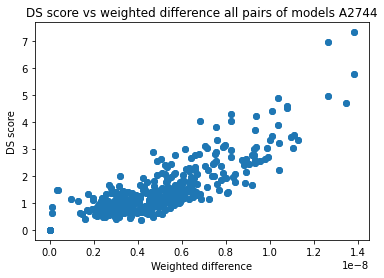

In [13]:
fig, ax = plt.subplots()
ax.scatter(distMatrix, dsMatrix)

ax.set_title("DS score vs weighted difference all pairs of models A2744")

ax.set_ylabel("DS score")
ax.set_xlabel("Weighted difference")


In [39]:
dsArr = []
distArr = []
for i in range(dsMatrix.shape[0]):
    for j in range(dsMatrix.shape[0]):
        if i != j:
            dsArr.append(dsMatrix[i, j])
            distArr.append(distMatrix[i, j])
            
dsArr = np.array(dsArr)
distArr = np.array(distArr)

[ 3.23272876e+16 -6.96495308e+07  8.48177844e-01]
R2 score: 0.7333118035470861


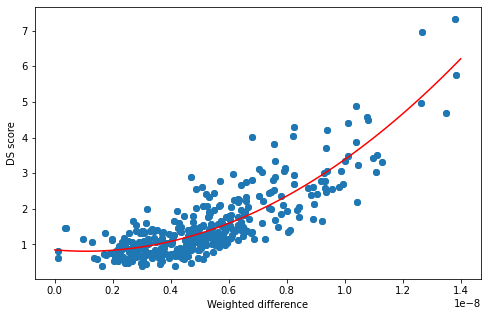

In [43]:
from sklearn.metrics import r2_score

fit = np.polyfit(distArr, dsArr, 2)
print(fit)

predict = np.poly1d(fit)
r2 = r2_score(dsArr, predict(distArr))

fig, ax = plt.subplots(figsize = (8, 5))

ax.set_ylabel("DS score")
ax.set_xlabel("Weighted difference")

ax.scatter(distArr, dsArr)

xvals = np.linspace(0, 1.4 * 10 ** -8, 100)
ax.plot(xvals, predict(xvals), color = "red")
print("R2 score: {}".format(r2))

Text(0.5, 0, 'Weighted difference')

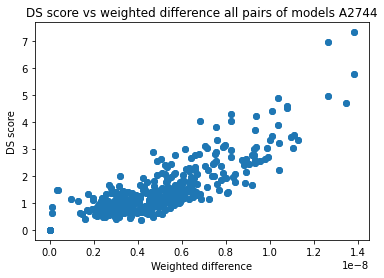

In [41]:
fig, ax = plt.subplots()
ax.scatter(distMatrix, dsMatrix)

ax.set_title("DS score vs weighted difference all pairs of models A2744")

ax.set_ylabel("DS score")
ax.set_xlabel("Weighted difference")

In [78]:
probs1 = np.loadtxt(probsBase + "CM + sigmaDet")
probs2 = np.loadtxt(probsBase + "Coe + rf")
print(msExtra(probs1[:,3], probs2[:,3], probs1[:,2]))
print(np.sum((probs1[:,3] - probs2[:,3]) * probs1[:,2]))

1849.9945516896707
1849.9945516896707


In [71]:
np.corrcoef([0, 0, 0], [1, 2, 3])

C:\Users\Jackson Lee\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Jackson Lee\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array([[nan, nan],
       [nan,  1.]])

In [3]:
scores = [[model, modelScores[model]] for model in modelScores.keys()]
pairs = []
for i in range(0, len(scores)):
    for j in range(i + 1, len(scores)):
        mod1 = scores[i]
        mod2 = scores[j]
        pairs.append([mod1[0], mod2[0], mod1[1], mod2[1]])

In [4]:
dat = []
for pair in pairs:
    dist1 = np.load(filebase + "\\MCMC\\"+ pair[0] + "-main.npy")
    dist2 = np.load(filebase + "\\MCMC\\" + pair[1] + "-main.npy")
    dscore = DS.TwoSampleTest(dist1, dist2)
    
    dat.append([pair[2], pair[3], dscore])
    
dat = np.array(dat)

In [5]:
compDict = {}
count = 0
for row in dat:
    if row[0] in compDict.keys():
        compDict[row[0]].append(row[2])
    else:
        compDict[row[0]] = [row[2]]
        
    if row[1] in compDict.keys():
        compDict[row[1]].append(row[2])
    else:
        compDict[row[1]] = [row[2]]
        

In [11]:
avg = [[key, sum(compDict[key]) / len(compDict[key]), statistics.stdev(compDict[key])] for key in compDict.keys()]

sigma = [[0.26811594202898553, 2.989491299256407, 1.3637240964375903]]

Text(0.5, 1.0, 'Abell 2744')

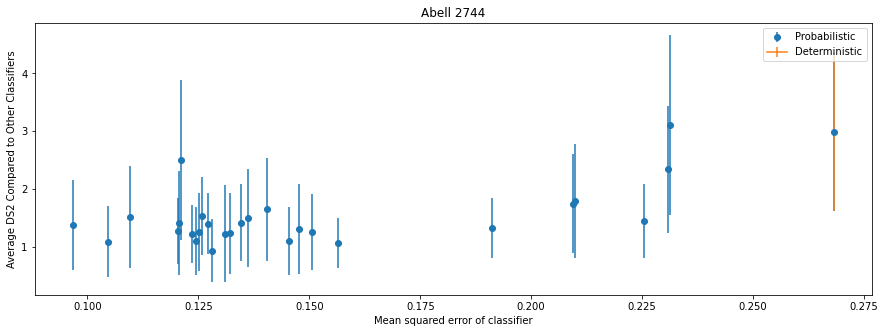

In [13]:
avg = np.array(avg)
sigma = np.array(sigma)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.errorbar(avg[:,0], avg[:,1], yerr = avg[:,2], fmt="o")

ax.errorbar(sigma[:,0], sigma[:,1], yerr = sigma[:,2])

ax.legend(['Probabilistic', 'Deterministic'])
ax.set_xlabel('Mean squared error of classifier')
ax.set_ylabel('Average DS2 Compared to Other Classifiers')
ax.set_title("Abell 2744")

In [14]:
maxDict = {}
for row in dat:
    mx = max(row[0], row[1]);
    if mx in maxDict.keys():
        maxDict[mx].append(row[2])
    else:
        maxDict[mx] = [row[2]]

In [17]:
mxs = [[key, sum(maxDict[key]) / len(maxDict[key]), statistics.stdev(compDict[key])] for key in maxDict.keys()]
print(mxs)
sigmamx = [[0.26811594202898553, 2.989491299256407, 1.3637240964375903]]

[[0.26811594202898553, 2.989491299256407, 1.3637240964375903], [0.22547818210879642, 1.3023962265706108, 0.6326319579055726], [0.1911916025615576, 1.1857340035799857, 0.5254965661720243], [0.20980918125385742, 1.717637851140957, 0.9930104994546126], [0.2311909088313751, 2.9415726376242373, 1.554198514343086], [0.20952269885434965, 1.7422883829327787, 0.8554677342310101], [0.23082433552205675, 2.2751150585897846, 1.098976835176956], [0.13108423408208766, 0.8238381930195029, 0.8372096340070715], [0.1321341774229136, 1.2176767336724585, 0.6929553221546116], [0.12576978736765007, 1.2927175272772753, 0.6765627112884101], [0.15055448651936312, 0.9669596782360103, 0.6575327012077958], [0.1475952478922243, 1.090874636389187, 0.7813690045908928], [0.13452594582983868, 1.245577174132204, 0.6641864990418755], [0.12718337542130914, 1.260847348501677, 0.5249808122543992], [0.1564913318544244, 0.9161906300870157, 0.43606822744263657], [0.12797256420880593, 0.77794859569915, 0.5516531762991256], [0.1

Text(0.5, 1.0, 'Abell 2744')

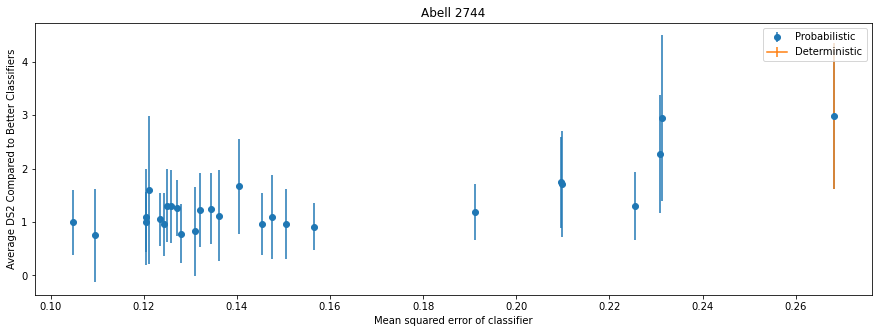

In [20]:
mxs = np.array(mxs)
sigmamx = np.array(sigmamx)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.errorbar(mxs[:,0], mxs[:,1], yerr = mxs[:,2], fmt="o")

ax.errorbar(sigmamx[:,0], sigmamx[:,1], yerr = sigmamx[:,2])

ax.legend(['Probabilistic', 'Deterministic'])
ax.set_xlabel('Mean squared error of classifier')
ax.set_ylabel('Average DS2 Compared to Better Classifiers')
ax.set_title("Abell 2744")

In [59]:
dscores = np.array(dscores)
print(np.argmax(dscores))
print(pairs[8])

8
['CM + sigmaDet', 'CM + cnb', 0.26811594202898553, 0.2311909088313751]


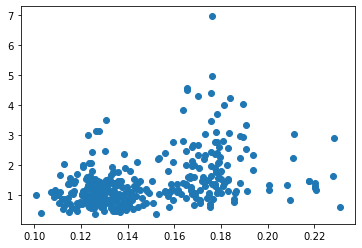

In [54]:
plt.scatter((dat[27:,0] + dat[27:,1])/2, dat[27:,2])

In [86]:
good = np.where((dat[:,0] < 0.14) & (dat[:,1] < 0.14))

(array([15., 35., 29., 24.,  7.,  4.,  3.,  0.,  0.,  3.]),
 array([0.38703554, 0.66289254, 0.93874954, 1.21460654, 1.49046354,
        1.76632053, 2.04217753, 2.31803453, 2.59389153, 2.86974853,
        3.14560553]),
 <BarContainer object of 10 artists>)

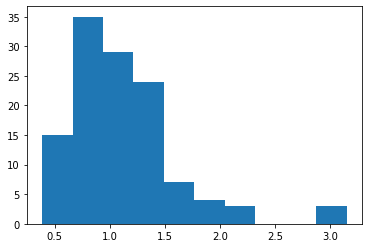

In [87]:
goodds = dat[good, 2][0]
plt.hist(goodds)

In [92]:
badgood = np.where((dat[:,0] > 0.14) | (dat[:,1] > 0.14))

(array([77., 89., 40., 29.,  9.,  7.,  4.,  1.,  0.,  2.]),
 array([0.38326728, 1.07643256, 1.76959784, 2.46276313, 3.15592841,
        3.84909369, 4.54225898, 5.23542426, 5.92858955, 6.62175483,
        7.31492011]),
 <BarContainer object of 10 artists>)

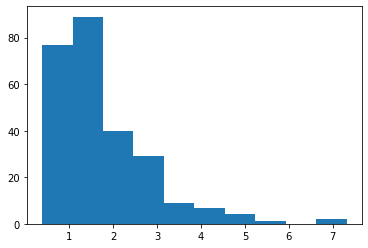

In [93]:
badgoodds = dat[badgood, 2][0]
plt.hist(badgoodds)